In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

covid_raw = pd.read_csv("maycovid.csv")
covid_raw

FIPS     Admin2  Province_State      Country_Region  \
0     45001.0  Abbeville  South Carolina                  US   
1     22001.0     Acadia       Louisiana                  US   
2     51001.0   Accomack        Virginia                  US   
3     16001.0        Ada           Idaho                  US   
4     19001.0      Adair            Iowa                  US   
...       ...        ...             ...                 ...   
3409      NaN        NaN             NaN  West Bank and Gaza   
3410      NaN        NaN             NaN      Western Sahara   
3411      NaN        NaN             NaN               Yemen   
3412      NaN        NaN             NaN              Zambia   
3413      NaN        NaN             NaN            Zimbabwe   

              Last_Update        Lat       Long_  Confirmed  Deaths  \
0     2020-05-28 02:32:31  34.223334  -82.461707         35       0   
1     2020-05-28 02:32:31  30.295065  -92.414197        397      22   
2     2020-05-28 02:32:31  37.767072  -75.632346        780      12   
3     2020-05-28 02:32:31  43.452658 -116.241552        798      22   
4     2020-05-28 02:32:31  41.330756  -94.471059          7       0   
...                   ...        ...         ...        ...     ...   
3409  2020-05-28 02:32:31  31.952200   35.233200        434       3   
3410  2020-05-28 02:32:31  24.215500  -12.885800          9       1   
3411  2020-05-28 02:32:31  15.552727   48.516388        256      53   
3412  2020-05-28 02:32:31 -13.133897   27.849332       1057       7   
3413  2020-05-28 02:32:31 -19.015438   29.154857        132       4   

      Recovered  Active                   Combined_Key  
0             0      35  Abbeville, South Carolina, US  
1             0     375          Acadia, Louisiana, US  
2             0     768         Accomack, Virginia, US  
3             0     776                 Ada, Idaho, US  
4             0       7                Adair, Iowa, US  
...         ...     ...                            ...  
3409        365      66             West Bank and Gaza  
3410          6       2                 Western Sahara  
3411         10     193                          Yemen  
3412        779     271                         Zambia  
3413         25     103                       Zimbabwe  

[3414 rows x 12 columns]

In [4]:
covid_raw.dtypes

FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Last_Update        object
Lat               float64
Long_             float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
Combined_Key       object
dtype: object

In [5]:
covid_raw.shape

(3414, 12)

In [6]:
del_col_list = ['FIPS', 'Last_Update']

covid = covid_raw.drop(del_col_list, axis=1)
covid.head()

Admin2  Province_State Country_Region        Lat       Long_  Confirmed  \
0  Abbeville  South Carolina             US  34.223334  -82.461707         35   
1     Acadia       Louisiana             US  30.295065  -92.414197        397   
2   Accomack        Virginia             US  37.767072  -75.632346        780   
3        Ada           Idaho             US  43.452658 -116.241552        798   
4      Adair            Iowa             US  41.330756  -94.471059          7   

   Deaths  Recovered  Active                   Combined_Key  
0       0          0      35  Abbeville, South Carolina, US  
1      22          0     375          Acadia, Louisiana, US  
2      12          0     768         Accomack, Virginia, US  
3      22          0     776                 Ada, Idaho, US  
4       0          0       7                Adair, Iowa, US

In [7]:
covid.columns = covid.columns.str.replace('Admin2','County')
covid.columns = covid.columns.str.replace('Long_','Long')
covid.head()

County  Province_State Country_Region        Lat        Long  Confirmed  \
0  Abbeville  South Carolina             US  34.223334  -82.461707         35   
1     Acadia       Louisiana             US  30.295065  -92.414197        397   
2   Accomack        Virginia             US  37.767072  -75.632346        780   
3        Ada           Idaho             US  43.452658 -116.241552        798   
4      Adair            Iowa             US  41.330756  -94.471059          7   

   Deaths  Recovered  Active                   Combined_Key  
0       0          0      35  Abbeville, South Carolina, US  
1      22          0     375          Acadia, Louisiana, US  
2      12          0     768         Accomack, Virginia, US  
3      22          0     776                 Ada, Idaho, US  
4       0          0       7                Adair, Iowa, US

In [8]:
print(covid.shape)
duplicate_rows_covid = covid[covid.duplicated()]
print(duplicate_rows_covid.shape)

(3414, 10)
(0, 10)


In [9]:
covid.columns

Index(['County', 'Province_State', 'Country_Region', 'Lat', 'Long',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Combined_Key'],
      dtype='object')

In [10]:
print(covid.isnull().sum())

County            401
Province_State    178
Country_Region      0
Lat                68
Long               68
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64


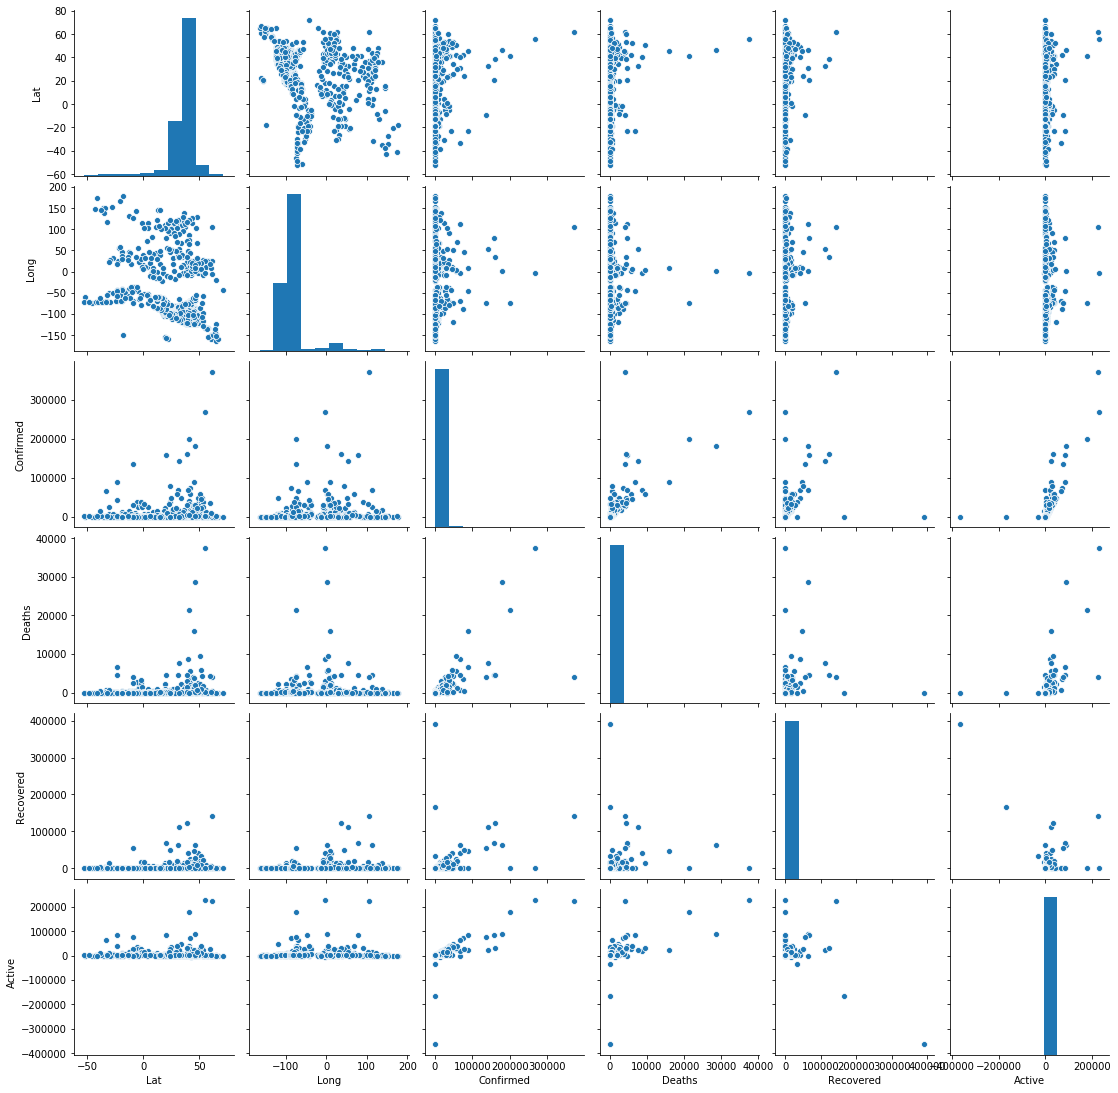

In [11]:
sns.pairplot(covid)
#there appears to be more confirmed cases and more deaths as latitude increases (north)

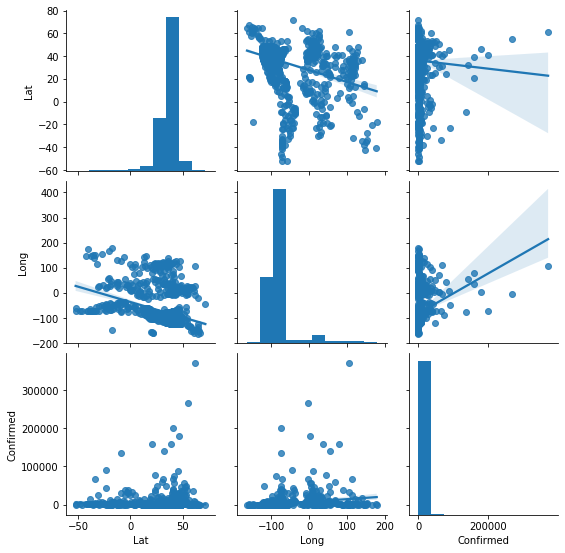

In [12]:
df_related = covid[['Lat','Long','Confirmed']]
sns.pairplot(df_related, kind='reg')

In [13]:
cases = covid.sort_values(by ='Confirmed', ascending=False)
cases

County Province_State  Country_Region        Lat        Long  \
3368            NaN            NaN          Russia  61.524010  105.318756   
3404            NaN            NaN  United Kingdom  55.378100   -3.436000   
1942  New York City       New York              US  40.767273  -73.971526   
3293            NaN            NaN          France  46.227600    2.213700   
3400            NaN            NaN          Turkey  38.963700   35.243300   
...             ...            ...             ...        ...         ...   
3222            NaN        Unknown           Spain        NaN         NaN   
2697     Unassigned        Indiana              US        NaN         NaN   
2448       Sheridan       Nebraska              US  42.502844 -102.412661   
955        Garfield     Washington              US  46.431975 -117.545403   
2719     Unassigned       Oklahoma              US        NaN         NaN   

      Confirmed  Deaths  Recovered  Active                 Combined_Key  
3368     370680    3968     142208  224504                       Russia  
3404     267240   37460          0  229780               United Kingdom  
1942     199968   21362          0  178606  New York City, New York, US  
3293     180044   28546      64503   86995                       France  
3400     159797    4431     122793   32573                       Turkey  
...         ...     ...        ...     ...                          ...  
3222          0       0          0       0               Unknown, Spain  
2697          0     159          0    -159      Unassigned, Indiana, US  
2448          0       0          0       0       Sheridan, Nebraska, US  
955           0       0          0       0     Garfield, Washington, US  
2719          0       0          0       0     Unassigned, Oklahoma, US  

[3414 rows x 10 columns]

In [14]:
average_in_country = covid.groupby(["Country_Region"])[["Confirmed"]].mean()
average_in_country.sort_values(by='Confirmed', ascending = False)


Confirmed
Country_Region             
Russia             370680.0
Turkey             159797.0
India              158086.0
Iran               141591.0
Peru               135905.0
...                     ...
Seychelles             11.0
MS Zaandam              9.0
Western Sahara          9.0
Papua New Guinea        8.0
Lesotho                 2.0

[188 rows x 1 columns]

In [15]:
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 dataframe
    """
    
    worst = covid[col].idxmax()
    worst_df = pd.DataFrame(covid.loc[worst])
    
    best = covid[col].idxmin()
    best_df = pd.DataFrame(covid.loc[best])
    
    info_df = pd.concat([worst_df, best_df], axis=1)
    return info_df

find_min_max_in('Confirmed')

3368                  83  
County              NaN                Arthur
Province_State      NaN              Nebraska
Country_Region   Russia                    US
Lat              61.524                41.569
Long            105.319              -101.696
Confirmed        370680                     0
Deaths             3968                     0
Recovered        142208                     0
Active           224504                     0
Combined_Key     Russia  Arthur, Nebraska, US

In [16]:
  def find_min_max_in(col): 
    worst = covid[col].idxmax()
    worst_df = pd.DataFrame(covid.loc[worst])
    
    best = covid[col].idxmin()
    best_df = pd.DataFrame(covid.loc[best])
    
    info_df = pd.concat([worst_df, best_df], axis=1)
    return info_df

find_min_max_in('Deaths')


3404                           0   
County                     NaN                      Abbeville
Province_State             NaN                 South Carolina
Country_Region  United Kingdom                             US
Lat                    55.3781                        34.2233
Long                    -3.436                       -82.4617
Confirmed               267240                             35
Deaths                   37460                              0
Recovered                    0                              0
Active                  229780                             35
Combined_Key    United Kingdom  Abbeville, South Carolina, US

In [17]:
average_in_lat = covid.groupby(["Lat"])[["Confirmed"]].mean()
average_in_lat.sort_values(by='Confirmed', ascending = False)

Confirmed
Lat                 
61.524010   370680.0
55.378100   267240.0
40.767273   199968.0
46.227600   180044.0
38.963700   159797.0
...              ...
41.915862        0.0
41.566503        0.0
46.233153        0.0
44.369562        0.0
41.567977        0.0

[3345 rows x 1 columns]

In [18]:
covid['fatalities'] = covid['Deaths'] / covid['Confirmed']
cols = covid.columns
covid = covid[cols]
covid.sort_values(by = ['fatalities'], ascending=False)

County Province_State Country_Region        Lat       Long  \
2687  Unassigned        Arizona             US        NaN        NaN   
2733  Unassigned        Wyoming             US        NaN        NaN   
2717  Unassigned   North Dakota             US        NaN        NaN   
2711  Unassigned         Nevada             US        NaN        NaN   
2703  Unassigned       Maryland             US        NaN        NaN   
...          ...            ...            ...        ...        ...   
2839  Washington         Kansas             US  39.784208 -97.087532   
3176         NaN      Recovered             US        NaN        NaN   
3219         NaN        Unknown         Brazil        NaN        NaN   
3220         NaN        Unknown          Chile        NaN        NaN   
3222         NaN        Unknown          Spain        NaN        NaN   

      Confirmed  Deaths  Recovered  Active                  Combined_Key  \
2687          0       2          0      -2       Unassigned, Arizona, US   
2733          0      13          0     -13       Unassigned, Wyoming, US   
2717          0       8          0      -8  Unassigned, North Dakota, US   
2711          0       6          0      -6        Unassigned, Nevada, US   
2703          0      67          0     -67      Unassigned, Maryland, US   
...         ...     ...        ...     ...                           ...   
2839          0       0          0       0        Washington, Kansas, US   
3176          0       0     391508 -364117                 Recovered, US   
3219          0       0     166647 -166647               Unknown, Brazil   
3220          0       0      33540  -33540                Unknown, Chile   
3222          0       0          0       0                Unknown, Spain   

      fatalities  
2687         inf  
2733         inf  
2717         inf  
2711         inf  
2703         inf  
...          ...  
2839         NaN  
3176         NaN  
3219         NaN  
3220         NaN  
3222         NaN  

[3414 rows x 11 columns]

In [19]:
#need to figure out how to remove rows with 'inf' fatalities

In [20]:
find_min_max_in('fatalities')

2687                           0   
County                       Unassigned                      Abbeville
Province_State                  Arizona                 South Carolina
Country_Region                       US                             US
Lat                                 NaN                        34.2233
Long                                NaN                       -82.4617
Confirmed                             0                             35
Deaths                                2                              0
Recovered                             0                              0
Active                               -2                             35
Combined_Key    Unassigned, Arizona, US  Abbeville, South Carolina, US
fatalities                          inf                              0

In [21]:
average_fatalities = covid.groupby(["Country_Region"])[["fatalities"]].mean()
average_fatalities.sort_values(by = ['fatalities'], ascending=False).head()

fatalities
Country_Region            
US                     inf
MS Zaandam        0.222222
Yemen             0.207031
Belgium           0.162592
Hungary           0.133140

In [22]:
covid.corr()

Lat      Long  Confirmed    Deaths  Recovered    Active  \
Lat         1.000000 -0.357331  -0.036375  0.009210   0.003772 -0.058857   
Long       -0.357331  1.000000   0.235082  0.145377   0.278142  0.160131   
Confirmed  -0.036375  0.235082   1.000000  0.754176   0.429323  0.693105   
Deaths      0.009210  0.145377   0.754176  1.000000   0.223009  0.565718   
Recovered   0.003772  0.278142   0.429323  0.223009   1.000000 -0.351046   
Active     -0.058857  0.160131   0.693105  0.565718  -0.351046  1.000000   
fatalities  0.011808  0.016188   0.032280  0.059655   0.019835  0.028443   

            fatalities  
Lat           0.011808  
Long          0.016188  
Confirmed     0.032280  
Deaths        0.059655  
Recovered     0.019835  
Active        0.028443  
fatalities    1.000000

In [23]:
#List of all of the countries in the dataset 

covid.Country_Region.unique()

array(['US', 'Italy', 'Brazil', 'Mexico', 'Canada', 'Spain',
       'United Kingdom', 'China', 'Chile', 'Netherlands', 'Australia',
       'Germany', 'Denmark', 'France', 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'G

In [24]:
#Add in a way to determine which territories go with which countries (and use on map?)

In [25]:
covid[covid['Country_Region']=='Australia']['Confirmed'].mean()
#it is likely that Australia is split into territories

893.75

In [26]:
covid[covid['Country_Region']=='United Kingdom']['Confirmed'].mean()
#It is likely that the UK is not split into territories

24419.909090909092

In [27]:
covid.mean()

Lat             36.104244
Long           -80.531102
Confirmed     1667.190978
Deaths         104.167838
Recovered      688.367897
Active         882.678383
fatalities            inf
dtype: float64

In [28]:
covid.std()

Lat              11.763628
Long             40.244297
Confirmed     11735.082842
Deaths         1024.359904
Recovered      8803.470047
Active        10361.865410
fatalities             NaN
dtype: float64

**US Data:**

Confirmed Cases:

In [29]:
covid[covid['Country_Region']=='US']['Confirmed'].mean()

#average number of cases per US location

562.641059602649

In [30]:
covid[covid['Country_Region']=='US']['Confirmed'].std()

4436.221444484899

In [31]:
covid[covid['Country_Region']=='US']['Confirmed'].median()

40.0

In [32]:
covid[covid['Country_Region']=='US']['Confirmed'].mode()
#This shows that due to the fact that so many US locations have no confirmed cases, the data is likely inaccurate (not sufficient testing)

0    1
dtype: int64

In [33]:
covid[covid['Country_Region']=='US']['Confirmed'].min()

0

In [34]:
covid[covid['Country_Region']=='US']['Confirmed'].max()

199968

In [35]:
quantile1 = covid[covid['Country_Region']=='US']['Confirmed'].quantile(0.25)
quantile1

10.0

In [36]:
quantile3 = covid[covid['Country_Region']=='US']['Confirmed'].quantile(0.75)
quantile3

188.25

In [37]:
IQR = quantile3-quantile1
IQR

178.25

Deaths:

In [38]:
covid[covid['Country_Region']=='US']['Deaths'].mean()

33.25099337748345

In [39]:
covid[covid['Country_Region']=='US']['Deaths'].std()

414.20310065784923

In [40]:
covid[covid['Country_Region']=='US']['Deaths'].median()

1.0

In [41]:
covid[covid['Country_Region']=='US']['Deaths'].mode()

0    0
dtype: int64

In [42]:
covid[covid['Country_Region']=='US']['Confirmed'].max()

199968

In [43]:
covid[covid['Country_Region']=='US']['Deaths'].quantile(0.9)

31.0

Linear Regression and Machine Learning

In [44]:
drop = ['fatalities']

covid = covid.drop(drop, axis=1)
covid.head()

County  Province_State Country_Region        Lat        Long  Confirmed  \
0  Abbeville  South Carolina             US  34.223334  -82.461707         35   
1     Acadia       Louisiana             US  30.295065  -92.414197        397   
2   Accomack        Virginia             US  37.767072  -75.632346        780   
3        Ada           Idaho             US  43.452658 -116.241552        798   
4      Adair            Iowa             US  41.330756  -94.471059          7   

   Deaths  Recovered  Active                   Combined_Key  
0       0          0      35  Abbeville, South Carolina, US  
1      22          0     375          Acadia, Louisiana, US  
2      12          0     768         Accomack, Virginia, US  
3      22          0     776                 Ada, Idaho, US  
4       0          0       7                Adair, Iowa, US

In [45]:
# select numerical columns
numerical_data = covid.select_dtypes(np.number).fillna(0)
numerical_data

Lat        Long  Confirmed  Deaths  Recovered  Active
0     34.223334  -82.461707         35       0          0      35
1     30.295065  -92.414197        397      22          0     375
2     37.767072  -75.632346        780      12          0     768
3     43.452658 -116.241552        798      22          0     776
4     41.330756  -94.471059          7       0          0       7
...         ...         ...        ...     ...        ...     ...
3409  31.952200   35.233200        434       3        365      66
3410  24.215500  -12.885800          9       1          6       2
3411  15.552727   48.516388        256      53         10     193
3412 -13.133897   27.849332       1057       7        779     271
3413 -19.015438   29.154857        132       4         25     103

[3414 rows x 6 columns]

In [46]:
# split the numerical data into training and test sets
from sklearn.model_selection import train_test_split

target_variable = 'Confirmed'
independent_variables = numerical_data.drop(columns = target_variable).columns
independent_variables

Index(['Lat', 'Long', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    numerical_data[independent_variables],
    numerical_data[target_variable],
    test_size=0.2,
    random_state=13
)

In [48]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test',  X_test.shape)
print('y_test',  y_test.shape)

X_train (2731, 5)
y_train (2731,)
X_test (683, 5)
y_test (683,)


In [49]:
# create a linear regression model and fit it with the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print(model.intercept_)

print(model.coef_)

16.16664689321601
[1.5421561  0.87551992 0.88723283 0.97031154 1.02410427]


In [51]:
# predict confirmed using test set
predictions = model.predict(X_test)

In [52]:
X = X_test.reset_index().copy()
X['Confirmed'] = y_test.tolist()
X['prediction'] = predictions
X.head()

index        Lat       Long  Deaths  Recovered  Active  Confirmed  \
0   1372  40.533587 -77.399751       4          0      91         95   
1   2663  43.344594 -99.885489       0          0       6          6   
2   3296  42.315400  43.356900      12        557     166        735   
3   1206  42.455221 -98.784026       0          0       1          1   
4   2191  36.859148 -76.359716      11          0     271        282   

   prediction  
0  107.653162  
1    1.703667  
2  840.495058  
3   -3.824053  
4  293.446572

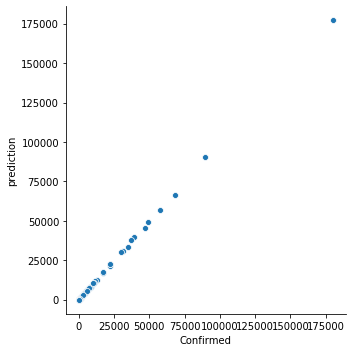

In [53]:
# visualize the actual confirmed against predicted 
sns.relplot(x='Confirmed', y='prediction', data=X, kind='scatter')

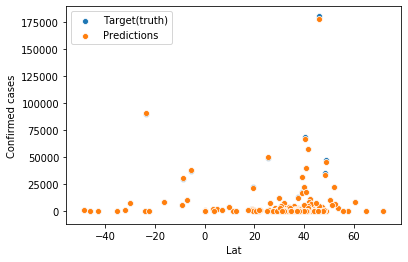

In [54]:
#visualize latitude against confirmed
sns.scatterplot(x=X["Lat"], y=X["Confirmed"], label = 'Target(truth)')
sns.scatterplot(x=X["Lat"], y=X["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("Confirmed cases");

# Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()

In [57]:
from sklearn.metrics import SCORERS

In [58]:
results_cross_validation = cross_val_score(
    estimator=model, 
    X=numerical_data[independent_variables],
    y=numerical_data[target_variable],
    scoring="neg_mean_absolute_error", 
    cv=5,
)

# 5 repetitions means 5 cv

In [59]:
results_cross_validation

array([  -14.67441074,   -14.85317946,   -23.02537247,   -15.30256467,
       -3405.71407625])

In [60]:
model_mae = results_cross_validation.mean()
model_mae

-694.71392071692

# Timeseries

Importing data over time:

In [61]:
import pandas as pd
january = pd.read_csv("januarycovid.csv")
february = pd.read_csv("februarycovid.csv")
march = pd.read_csv("marchcovid.csv")
april = pd.read_csv("aprilcovid.csv")
may = pd.read_csv("maycovid.csv")

In [62]:
january.rename(columns={"Province/State":"Province_State"}, inplace=True)
january.rename(columns={"Country/Region":"Country_Region"}, inplace=True)
january.rename(columns={"Last Update":"Date"}, inplace=True)

february.rename(columns={"Province/State":"Province_State"}, inplace=True)
february.rename(columns={"Country/Region":"Country_Region"}, inplace=True)
february.rename(columns={"Last Update":"Date"}, inplace=True)

del_col_list = ['FIPS', 'Admin2', 'Lat', 'Long_', 'Active', 'Combined_Key']
march = march.drop(del_col_list, axis=1)

del_col_list = ['FIPS', 'Admin2', 'Lat', 'Long_', 'Active', 'Combined_Key']
april = april.drop(del_col_list, axis=1)

del_col_list = ['FIPS', 'Admin2', 'Lat', 'Long_', 'Active', 'Combined_Key']
may = may.drop(del_col_list, axis=1)

In [117]:
may.head()

Province_State Country_Region                 Date  Confirmed  Deaths  \
0  South Carolina             US  2020-05-28 02:32:31         35       0   
1       Louisiana             US  2020-05-28 02:32:31        397      22   
2        Virginia             US  2020-05-28 02:32:31        780      12   
3           Idaho             US  2020-05-28 02:32:31        798      22   
4            Iowa             US  2020-05-28 02:32:31          7       0   

   Recovered  
0          0  
1          0  
2          0  
3          0  
4          0

In [63]:
march.rename(columns={"Last_Update":"Date"}, inplace=True)
april.rename(columns={"Last_Update":"Date"}, inplace=True)
may.rename(columns={"Last_Update":"Date"}, inplace=True)

In [64]:
full_data = pd.concat([january, february, march, april, may],ignore_index=True)
full_data

Province_State      Country_Region                 Date  Confirmed  \
0              Hubei      Mainland China        1/28/20 23:00       3554   
1          Guangdong      Mainland China        1/28/20 23:00        207   
2           Zhejiang      Mainland China        1/28/20 23:00        173   
3              Henan      Mainland China        1/28/20 23:00        168   
4              Hunan      Mainland China        1/28/20 23:00        143   
...              ...                 ...                  ...        ...   
10168            NaN  West Bank and Gaza  2020-05-28 02:32:31        434   
10169            NaN      Western Sahara  2020-05-28 02:32:31          9   
10170            NaN               Yemen  2020-05-28 02:32:31        256   
10171            NaN              Zambia  2020-05-28 02:32:31       1057   
10172            NaN            Zimbabwe  2020-05-28 02:32:31        132   

       Deaths  Recovered  
0       125.0       80.0  
1         NaN        4.0  
2         NaN        3.0  
3         1.0        NaN  
4         NaN        NaN  
...       ...        ...  
10168     3.0      365.0  
10169     1.0        6.0  
10170    53.0       10.0  
10171     7.0      779.0  
10172     4.0       25.0  

[10173 rows x 6 columns]

In [219]:
data = full_data.groupby(["Date", "Country_Region", "Province_State"])["Confirmed", "Deaths", "Recovered"].sum().reset_index()
data

/Users/elysemigdal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Date  Country_Region  \
0          1/28/20 23:00       Australia   
1          1/28/20 23:00       Australia   
2          1/28/20 23:00          Canada   
3          1/28/20 23:00          Canada   
4          1/28/20 23:00         Germany   
5          1/28/20 23:00       Hong Kong   
6          1/28/20 23:00           Macau   
7          1/28/20 23:00  Mainland China   
8          1/28/20 23:00  Mainland China   
9          1/28/20 23:00  Mainland China   
10         1/28/20 23:00  Mainland China   
11         1/28/20 23:00  Mainland China   
12         1/28/20 23:00  Mainland China   
13         1/28/20 23:00  Mainland China   
14         1/28/20 23:00  Mainland China   
15         1/28/20 23:00  Mainland China   
16         1/28/20 23:00  Mainland China   
17         1/28/20 23:00  Mainland China   
18         1/28/20 23:00  Mainland China   
19         1/28/20 23:00  Mainland China   
20         1/28/20 23:00  Mainland China   
21         1/28/20 23:00  Mainland China   
22         1/28/20 23:00  Mainland China   
23         1/28/20 23:00  Mainland China   
24         1/28/20 23:00  Mainland China   
25         1/28/20 23:00  Mainland China   
26         1/28/20 23:00  Mainland China   
27         1/28/20 23:00  Mainland China   
28         1/28/20 23:00  Mainland China   
29         1/28/20 23:00  Mainland China   
30         1/28/20 23:00  Mainland China   
31         1/28/20 23:00  Mainland China   
32         1/28/20 23:00  Mainland China   
33         1/28/20 23:00  Mainland China   
34         1/28/20 23:00  Mainland China   
35         1/28/20 23:00  Mainland China   
36         1/28/20 23:00  Mainland China   
37         1/28/20 23:00          Taiwan   
38         1/28/20 23:00              US   
39         1/28/20 23:00              US   
40         1/28/20 23:00              US   
41         1/28/20 23:00              US   
42         2/23/20 11:19           China   
43         2/23/20 11:19           China   
44   2020-02-01T19:53:03              US   
45   2020-02-01T19:53:03              US   
46   2020-02-03T03:53:02              US   
47   2020-02-05T21:53:02              US   
48   2020-02-09T07:03:04              US   
49   2020-02-09T19:03:03              US   
50   2020-02-12T06:43:02  Mainland China   
51   2020-02-12T18:53:03          Canada   
52   2020-02-13T17:53:03       Australia   
53   2020-02-13T17:53:03       Australia   
54   2020-02-13T18:53:02              US   
55   2020-02-17T08:13:09       Australia   
56   2020-02-21T04:43:02  Mainland China   
57   2020-02-21T05:13:09              US   
58   2020-02-21T05:23:04              US   
59   2020-02-21T05:43:02       Australia   
60   2020-02-21T05:43:02              US   
61   2020-02-24T23:33:02              US   
62   2020-02-24T23:33:02              US   
63   2020-02-24T23:33:02              US   
64   2020-02-25T21:23:03              US   
65   2020-02-27T00:43:02  Mainland China   
66   2020-02-27T03:33:06       Australia   
67   2020-02-27T03:33:06          Canada   
68   2020-02-27T10:03:07  Mainland China   
69   2020-02-27T12:43:02           Macau   
70   2020-02-27T14:13:06  Mainland China   
71   2020-02-27T20:33:02              US   
72   2020-02-27T22:43:02          Canada   
73   2020-02-27T23:13:04  Mainland China   
74   2020-02-28T00:43:01  Mainland China   
75   2020-02-28T01:13:11  Mainland China   
76   2020-02-28T02:23:05  Mainland China   
77   2020-02-28T02:33:02  Mainland China   
78   2020-02-28T04:43:02  Mainland China   
79   2020-02-28T04:43:02  Mainland China   
80   2020-02-28T04:53:03  Mainland China   
81   2020-02-28T05:03:09  Mainland China   
82   2020-02-28T05:23:07          Canada   
83   2020-02-28T07:13:08          Taiwan   
84   2020-02-28T07:23:03  Mainland China   
85   2020-02-28T07:43:02  Mainland China   
86   2020-02-28T08:53:03  Mainland China   
87   2020-02-28T08:53:03  Mainland China   
88   2020-02-28T08:53:03  Mainland China   
89   2020-02-28T08:53:03  Mainland China   
90   2020-02-28T

In [220]:
US = data[data["Country_Region"] == "US"]
US = US.drop(['Country_Region'], axis=1)
US.rename(columns={"Province_State":"State"}, inplace=True)
US.head()

Date            State  Confirmed  Deaths  Recovered
38        1/28/20 23:00          Arizona          1     0.0        0.0
39        1/28/20 23:00       California          2     0.0        0.0
40        1/28/20 23:00         Illinois          1     0.0        0.0
41        1/28/20 23:00       Washington          1     0.0        0.0
44  2020-02-01T19:53:03  Los Angeles, CA          1     0.0        0.0

In [221]:
US.Location.unique()

AttributeError: 'DataFrame' object has no attribute 'Location'

In [232]:
US['State'] = US['State'].str.replace('Los Angeles, CA', 'California')
US['State'] = US['State'].str.replace('Orange, CA', 'California')
US['State'] = US['State'].str.replace('San Benito, CA', 'California')
US['State'] = US['State'].str.replace('Humboldt County, CA', 'California')
US['State'] = US['State'].str.replace('Santa Clara, CA', 'California')
US['State'] = US['State'].str.replace('San Diego County, CA', 'California')
US['State'] = US['State'].str.replace('Sacramento County, CA', 'California')
US['State'] = US['State'].str.replace('Los Angeles, CA', 'California')
US['State'] = US['State'].str.replace('Madison, WI', 'Wisconsin')
US['State'] = US['State'].str.replace('Seattle, WA', 'Washington')
US['State'] = US['State'].str.replace('Chicago, IL', 'Illinois')
US['State'] = US['State'].str.replace('San Antonio, TX', 'Texas')
US['State'] = US['State'].str.replace('Tempe, AZ', 'Arizona')
US['State'] = US['State'].str.replace('Boston, MA', 'Massachusetts')

In [233]:
US

Date                                        State  \
38         1/28/20 23:00                                      Arizona   
39         1/28/20 23:00                                   California   
40         1/28/20 23:00                                     Illinois   
41         1/28/20 23:00                                   Washington   
44   2020-02-01T19:53:03                                   California   
45   2020-02-01T19:53:03                                   California   
46   2020-02-03T03:53:02                                   California   
47   2020-02-05T21:53:02                                    Wisconsin   
48   2020-02-09T07:03:04                                   Washington   
49   2020-02-09T19:03:03                                     Illinois   
54   2020-02-13T18:53:02                                        Texas   
57   2020-02-21T05:13:09                                   California   
58   2020-02-21T05:23:04                                   California   
60   2020-02-21T05:43:02                                   California   
61   2020-02-24T23:33:02         Lackland, TX (From Diamond Princess)   
62   2020-02-24T23:33:02            Omaha, NE (From Diamond Princess)   
63   2020-02-24T23:33:02           Travis, CA (From Diamond Princess)   
64   2020-02-25T21:23:03                                      Arizona   
71   2020-02-27T20:33:02                                   California   
100  2020-02-28T20:03:03  Unassigned Location (From Diamond Princess)   
102  2020-02-28T21:13:12                                Massachusetts   
177  2020-04-29 02:32:29                                      Alabama   
178  2020-04-29 02:32:29                                       Alaska   
179  2020-04-29 02:32:29                                      Arizona   
180  2020-04-29 02:32:29                                     Arkansas   
181  2020-04-29 02:32:29                                   California   
182  2020-04-29 02:32:29                                     Colorado   
183  2020-04-29 02:32:29                                  Connecticut   
184  2020-04-29 02:32:29                                     Delaware   
185  2020-04-29 02:32:29                             Diamond Princess   
186  2020-04-29 02:32:29                         District of Columbia   
187  2020-04-29 02:32:29                                      Florida   
188  2020-04-29 02:32:29                                      Georgia   
189  2020-04-29 02:32:29                               Grand Princess   
190  2020-04-29 02:32:29                                         Guam   
191  2020-04-29 02:32:29                                       Hawaii   
192  2020-04-29 02:32:29                                        Idaho   
193  2020-04-29 02:32:29                                     Illinois   
194  2020-04-29 02:32:29                                      Indiana   
195  2020-04-29 02:32:29                                         Iowa   
196  2020-04-29 02:32:29                                       Kansas   
197  2020-04-29 02:32:29                                     Kentucky   
198  2020-04-29 02:32:29                                    Louisiana   
199  2020-04-29 02:32:29                                        Maine   
200  2020-04-29 02:32:29                                     Maryland   
201  2020-04-29 02:32:29                                Massachusetts   
202  2020-04-29 02:32:29                                     Michigan   
203  2020-04-29 02:32:29                                    Minnesota   
204  2020-04-29 02:32:29                                  Mississippi   
205  2020-04-29 02:32:29                                     Missouri   
206  2020-04-29 02:32:29                                      Montana   
207  2020-04-29 02:32:29                                     Nebraska   
208  2020-04-29 02:32:29                                       Nevada   
209  2020-04-29 02:32:29                                New Hampshire   
210  

In [234]:
US_ = US.drop([61, 62, 63, 100, 185, 189, 190, 215, 220, 221, 229, 459, 463, 464, 489, 494, 495, 503, 557, 564, 568, 569, 594, 599, 600, 608 ])

In [235]:
US_

Date                 State  Confirmed   Deaths  Recovered
38         1/28/20 23:00               Arizona          1      0.0        0.0
39         1/28/20 23:00            California          2      0.0        0.0
40         1/28/20 23:00              Illinois          1      0.0        0.0
41         1/28/20 23:00            Washington          1      0.0        0.0
44   2020-02-01T19:53:03            California          1      0.0        0.0
45   2020-02-01T19:53:03            California          1      0.0        0.0
46   2020-02-03T03:53:02            California          2      0.0        0.0
47   2020-02-05T21:53:02             Wisconsin          1      0.0        0.0
48   2020-02-09T07:03:04            Washington          1      0.0        1.0
49   2020-02-09T19:03:03              Illinois          2      0.0        2.0
54   2020-02-13T18:53:02                 Texas          1      0.0        0.0
57   2020-02-21T05:13:09            California          1      0.0        0.0
58   2020-02-21T05:23:04            California          2      0.0        1.0
60   2020-02-21T05:43:02            California          2      0.0        1.0
64   2020-02-25T21:23:03               Arizona          1      0.0        1.0
71   2020-02-27T20:33:02            California          2      0.0        0.0
102  2020-02-28T21:13:12         Massachusetts          1      0.0        1.0
177  2020-04-29 02:32:29               Alabama       6750    242.0        0.0
178  2020-04-29 02:32:29                Alaska        351      9.0        0.0
179  2020-04-29 02:32:29               Arizona       6955    275.0        0.0
180  2020-04-29 02:32:29              Arkansas       3127     57.0        0.0
181  2020-04-29 02:32:29            California      46164   1864.0        0.0
182  2020-04-29 02:32:29              Colorado      14316    736.0        0.0
183  2020-04-29 02:32:29           Connecticut      26312   2087.0        0.0
184  2020-04-29 02:32:29              Delaware       4575    137.0        0.0
186  2020-04-29 02:32:29  District of Columbia       3994    190.0        0.0
187  2020-04-29 02:32:29               Florida      32848   1171.0        0.0
188  2020-04-29 02:32:29               Georgia      24922   1036.0        0.0
191  2020-04-29 02:32:29                Hawaii        609     16.0        0.0
192  2020-04-29 02:32:29                 Idaho       1952     60.0        0.0
193  2020-04-29 02:32:29              Illinois      48102   2125.0        0.0
194  2020-04-29 02:32:29               Indiana      16588    901.0        0.0
195  2020-04-29 02:32:29                  Iowa       6376    136.0        0.0
196  2020-04-29 02:32:29                Kansas       3652    127.0        0.0
197  2020-04-29 02:32:29              Kentucky       4375    225.0        0.0
198  2020-04-29 02:32:29             Louisiana      27286   1801.0        0.0
199  2020-04-29 02:32:29                 Maine       1040     51.0        0.0
200  2020-04-29 02:32:29              Maryland      20113   1016.0        0.0
201  2020-04-29 02:32:29         Massachusetts      58302   3153.0        0.0
202  2020-04-29 02:32:29              Michigan      39262   3568.0        0.0
203  2020-04-29 02:32:29             Minnesota       4181    301.0        0.0
204  2020-04-29 02:32:29           Mississippi       6342    239.0        0.0
205  2020-04-29 02:32:29              Missouri       7450    330.0        0.0
206  2020-04-29 02:32:29               Montana        451     15.0        0.0
207  2020-04-29 02:32:29              Nebraska       3517     56.0        0.0
208  2020-04-29 02:32:29                Nevada       4821    219.0        0.0
209  2020-04-29 02:32:29         New Hampshire       2010     60.0        0.0
210  2020-04-29 02:32:29            New Jersey     113856   6442.0        0.0
211  2020-04-29 02:32:29            New Mexico       2974    105.0        0.0
212  2020-04-29 02:32:29              New York     295106  22912.0        0.0
213  2020-04-29 02:32:29        North Caro

In [236]:
US_final = US_.drop([44, 45, 46, 47, 48, 49, 54, 57, 58, 60, 64, 71])

In [237]:
US_final

Date                 State  Confirmed   Deaths  Recovered
38         1/28/20 23:00               Arizona          1      0.0        0.0
39         1/28/20 23:00            California          2      0.0        0.0
40         1/28/20 23:00              Illinois          1      0.0        0.0
41         1/28/20 23:00            Washington          1      0.0        0.0
102  2020-02-28T21:13:12         Massachusetts          1      0.0        1.0
177  2020-04-29 02:32:29               Alabama       6750    242.0        0.0
178  2020-04-29 02:32:29                Alaska        351      9.0        0.0
179  2020-04-29 02:32:29               Arizona       6955    275.0        0.0
180  2020-04-29 02:32:29              Arkansas       3127     57.0        0.0
181  2020-04-29 02:32:29            California      46164   1864.0        0.0
182  2020-04-29 02:32:29              Colorado      14316    736.0        0.0
183  2020-04-29 02:32:29           Connecticut      26312   2087.0        0.0
184  2020-04-29 02:32:29              Delaware       4575    137.0        0.0
186  2020-04-29 02:32:29  District of Columbia       3994    190.0        0.0
187  2020-04-29 02:32:29               Florida      32848   1171.0        0.0
188  2020-04-29 02:32:29               Georgia      24922   1036.0        0.0
191  2020-04-29 02:32:29                Hawaii        609     16.0        0.0
192  2020-04-29 02:32:29                 Idaho       1952     60.0        0.0
193  2020-04-29 02:32:29              Illinois      48102   2125.0        0.0
194  2020-04-29 02:32:29               Indiana      16588    901.0        0.0
195  2020-04-29 02:32:29                  Iowa       6376    136.0        0.0
196  2020-04-29 02:32:29                Kansas       3652    127.0        0.0
197  2020-04-29 02:32:29              Kentucky       4375    225.0        0.0
198  2020-04-29 02:32:29             Louisiana      27286   1801.0        0.0
199  2020-04-29 02:32:29                 Maine       1040     51.0        0.0
200  2020-04-29 02:32:29              Maryland      20113   1016.0        0.0
201  2020-04-29 02:32:29         Massachusetts      58302   3153.0        0.0
202  2020-04-29 02:32:29              Michigan      39262   3568.0        0.0
203  2020-04-29 02:32:29             Minnesota       4181    301.0        0.0
204  2020-04-29 02:32:29           Mississippi       6342    239.0        0.0
205  2020-04-29 02:32:29              Missouri       7450    330.0        0.0
206  2020-04-29 02:32:29               Montana        451     15.0        0.0
207  2020-04-29 02:32:29              Nebraska       3517     56.0        0.0
208  2020-04-29 02:32:29                Nevada       4821    219.0        0.0
209  2020-04-29 02:32:29         New Hampshire       2010     60.0        0.0
210  2020-04-29 02:32:29            New Jersey     113856   6442.0        0.0
211  2020-04-29 02:32:29            New Mexico       2974    105.0        0.0
212  2020-04-29 02:32:29              New York     295106  22912.0        0.0
213  2020-04-29 02:32:29        North Carolina       9755    363.0        0.0
214  2020-04-29 02:32:29          North Dakota        991     19.0        0.0
216  2020-04-29 02:32:29                  Ohio      16769    799.0        0.0
217  2020-04-29 02:32:29              Oklahoma       3410    207.0        0.0
218  2020-04-29 02:32:29                Oregon       2385     99.0        0.0
219  2020-04-29 02:32:29          Pennsylvania      45137   2046.0        0.0
222  2020-04-29 02:32:29          Rhode Island       7927    239.0        0.0
223  2020-04-29 02:32:29        South Carolina       5735    192.0        0.0
224  2020-04-29 02:32:29          South Dakota       2313     11.0        0.0
225  2020-04-29 02:32:29             Tennessee      10052    188.0        0.0
226  2020-04-29 02:32:29                 Texas      26357    719.0        0.0
227  2020-04-29 02:32:29                  Utah       4345     41.0        0.0
228  2020-04-29 02:32:29               Ver

In [238]:
US_final.Date.unique()

array(['1/28/20 23:00', '2020-02-28T21:13:12', '2020-04-29 02:32:29',
       '2020-05-28 02:32:31', '3/28/20 23:05'], dtype=object)

In [239]:
US_final['Date'] = US_final['Date'].str.replace('1/28/20 23:00', '01-28')
US_final['Date'] = US_final['Date'].str.replace('2020-02-28T21:13:12', '02-28')
US_final['Date'] = US_final['Date'].str.replace('2020-04-29 02:32:29', '04-29')
US_final['Date'] = US_final['Date'].str.replace('2020-05-28 02:32:31', '05-28')
US_final['Date'] = US_final['Date'].str.replace('3/28/20 23:05', '03-28')

In [240]:
US_final.sort_values(by=['Date'])

Date                 State  Confirmed   Deaths  Recovered
38   01-28               Arizona          1      0.0        0.0
39   01-28            California          2      0.0        0.0
40   01-28              Illinois          1      0.0        0.0
41   01-28            Washington          1      0.0        0.0
102  02-28         Massachusetts          1      0.0        1.0
581  03-28              Michigan       4650    111.0        0.0
580  03-28         Massachusetts       4257     44.0        0.0
579  03-28              Maryland        995      5.0        0.0
578  03-28                 Maine        211      1.0        0.0
577  03-28             Louisiana       3315    137.0        0.0
576  03-28              Kentucky        380      9.0        0.0
575  03-28                Kansas        266      4.0        0.0
574  03-28                  Iowa        298      3.0        0.0
573  03-28               Indiana       1233     31.0        0.0
572  03-28              Illinois       3491     47.0        0.0
571  03-28                 Idaho        234      4.0        0.0
567  03-28               Georgia       2366     69.0        0.0
582  03-28             Minnesota        441      5.0        0.0
566  03-28               Florida       3763     54.0        0.0
565  03-28  District of Columbia        304      4.0        0.0
563  03-28              Delaware        214      5.0        0.0
562  03-28           Connecticut       1524     33.0        0.0
561  03-28              Colorado       1740     31.0        0.0
560  03-28            California       5095    110.0        0.0
559  03-28              Arkansas        409      5.0        0.0
558  03-28               Arizona        773     15.0        0.0
556  03-28                Alaska         85      2.0        0.0
570  03-28                Hawaii        149      0.0        0.0
583  03-28           Mississippi        663     13.0        0.0
585  03-28               Montana        129      1.0        0.0
555  03-28               Alabama        694      4.0        0.0
611  03-28         West Virginia         96      0.0        0.0
610  03-28            Washington       4030    188.0        0.0
609  03-28              Virginia        740     13.0        0.0
607  03-28               Vermont        211     12.0        0.0
606  03-28                  Utah        602      1.0        0.0
605  03-28                 Texas       2455     30.0        0.0
604  03-28             Tennessee       1511      7.0        0.0
603  03-28          South Dakota         68      1.0        0.0
602  03-28        South Carolina        660     15.0        0.0
601  03-28          Rhode Island        239      2.0        0.0
584  03-28              Missouri        836     10.0        0.0
598  03-28          Pennsylvania       2845     34.0        0.0
596  03-28              Oklahoma        377     15.0        0.0
595  03-28                  Ohio       1406     25.0        0.0
593  03-28          North Dakota         94      1.0        0.0
592  03-28        North Carolina       1020      5.0        0.0
591  03-28              New York      52410    728.0        0.0
590  03-28            New Mexico        208      1.0        0.0
589  03-28            New Jersey      11124    140.0        0.0
588  03-28         New Hampshire        187      2.0        0.0
587  03-28                Nevada        626     10.0        0.0
586  03-28              Nebraska         96      2.0        0.0
597  03-28                Oregon        479     13.0        0.0
612  03-28             Wisconsin       1055     17.0        0.0
613  03-28               Wyoming         82      0.0        0.0
203  04-29             Minnesota       4181    301.0        0.0
206  04-29               Montana        451     15.0        0.0
207  04-29              Nebraska       3517     56.0        0.0
208  04-29                Nevada       4821    219.0        0.0
209  04-29         New Hampshire       2010     60.0        0.0
210  04-29            New Jersey     1

In [241]:
US_final.dtypes

Date          object
State         object
Confirmed      int64
Deaths       float64
Recovered    float64
dtype: object